In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm
import copy
import scipy.io

In [2]:
data = scipy.io.loadmat('digits.mat')

In [3]:
x_train = np.array(data['train']).astype('float64')
x_train = x_train.T
y_train = np.array(data['trainlabels']).astype('float64')
print(y_train.shape)
x_test = np.array(data['test']).astype('float64')
x_test = x_test.T
y_test = np.array(data['testlabels']).astype('float64')

(5000, 1)


In [4]:
def digit_percep(x_train, y_train, lr, digit):
    y = copy.deepcopy(y_train)
    
    lr_init = lr
    
    for val in y:
        if val[0] != digit:
            val[0] = -1
        else:
            val[0] = 1

    weights = np.random.rand(x_train.shape[1]) - 0.5
    
    errors = 0
    for i, x in enumerate(x_train):
        lr -= lr/(x_train.shape[0]-i)
        
        error = np.sign(y[i][0]) - np.sign(np.matmul(x.T, weights))
        weights = weights + 1/2 * lr * error * x
        
        if i >= x_train.shape[0] - 101:
            if error != 0:
                errors += 1
                
    return weights, errors 

The number of errors in the last 100 iterations when detecting the digit 0 is 0
The number of errors in the last 100 iterations when detecting the digit 1 is 1
The number of errors in the last 100 iterations when detecting the digit 2 is 4
The number of errors in the last 100 iterations when detecting the digit 8 is 10


Text(0.5, 1.0, 'Values of weights for digit 8')

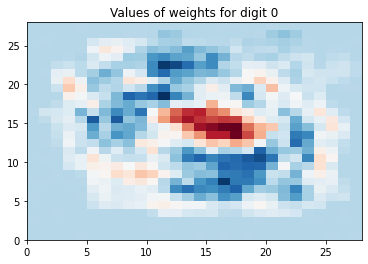

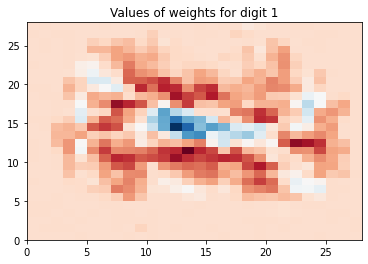

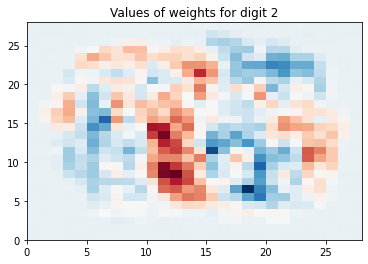

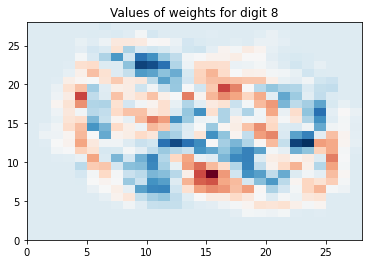

In [5]:
#Detecting digit 0
fin_weights, errors = digit_percep(x_train, y_train, 0.1, 0)
print(f'The number of errors in the last 100 iterations when detecting the digit 0 is {errors}')

weights_img = fin_weights.reshape((28, 28))      
        
fig0, ax0 = plt.subplots()
psm = ax0.pcolormesh(weights_img, cmap='RdBu')
ax0.set_title('Values of weights for digit 0')




#Detecting digit 1
fin_weights, errors = digit_percep(x_train, y_train, 0.1, 1)
print(f'The number of errors in the last 100 iterations when detecting the digit 1 is {errors}')

weights_img = fin_weights.reshape((28, 28))      
        
fig1, ax1 = plt.subplots()
psm = ax1.pcolormesh(weights_img, cmap='RdBu')
ax1.set_title('Values of weights for digit 1')



#Detecting digit 2
fin_weights, errors = digit_percep(x_train, y_train, 0.1, 2)
print(f'The number of errors in the last 100 iterations when detecting the digit 2 is {errors}')

weights_img = fin_weights.reshape((28, 28))      
        
fig2, ax2 = plt.subplots()
psm = ax2.pcolormesh(weights_img, cmap='RdBu')
ax2.set_title('Values of weights for digit 2')



#Detecting digit 3
fin_weights, errors = digit_percep(x_train, y_train, 0.1, 8)
print(f'The number of errors in the last 100 iterations when detecting the digit 8 is {errors}')

weights_img = fin_weights.reshape((28, 28))      
        
fig3, ax3 = plt.subplots()
psm = ax3.pcolormesh(weights_img, cmap='RdBu')
ax3.set_title('Values of weights for digit 8')

In [6]:
def one_hot(y, n):
    new_y = []
    for elem in y:
        temp_arr = np.zeros(n)
        temp_arr[int(elem[0])] = 1
        new_y.append(temp_arr)
        
    return np.array(new_y)


def sigmoid(x, alpha):
    return np.power(1 + np.exp(-alpha*x), -1)
    

def test_ffnn(x_test, y_test, hl_w, ol_w, hl_b, ol_b, alpha):
    correct = 0
    loss = 0
    
    new_y = one_hot(y_train, 10)
    
    for n, obs in enumerate(x_test):
        obs_y = np.reshape(new_y[n], (10, 1))
        obs = np.reshape(obs, (obs.shape[0], 1))

        v_hl = np.matmul(hl_w, obs) + hl_b
        y_hl = sigmoid(v_hl, alpha) 

        v_ol = np.matmul(ol_w, y_hl) + ol_b
        y_ol = sigmoid(v_ol, alpha)
    
        error = y_ol - obs_y
        loss += np.sum(np.power(error, 2))
    
        y_ol = y_ol.tolist()
        digit = y_ol.index(max(y_ol))
    
        if y_test[n][0] == digit:
            correct += 1
       
    acc = round(correct/x_test.shape[0], 3)
    loss = round(loss/x_test.shape[0], 3) 
    return acc, loss    
    
    
def ffnn(x_train, y_train, epochs, lr, alpha):
    new_y = one_hot(y_train, 10)
    
    x_train_bias = np.hstack((np.ones((x_train.shape[0], 1)), x_train))
    
    hl_w = np.random.rand(25, 784) - 0.5
    hl_b = np.random.rand(25, 1) - 0.5
    ol_w = np.random.rand(10, 25) - 0.5
    ol_b = np.random.rand(10, 1) - 0.5
    
    accuracy_hist = []
    loss_hist = []
    
    for iteration in range(epochs):
        acc, loss = test_ffnn(x_train, y_train, hl_w, ol_w, hl_b, ol_b, alpha)
        
        accuracy_hist.append(acc)
        loss_hist.append(loss)
        
        for n, obs in enumerate(x_train):
            obs_y = np.reshape(new_y[n], (10, 1))
            obs = np.reshape(obs, (obs.shape[0], 1))
            
            v_hl = np.matmul(hl_w, obs) + hl_b
            y_hl = sigmoid(v_hl, alpha)
            
            v_ol = np.matmul(ol_w, y_hl) + ol_b
            y_ol = sigmoid(v_ol, alpha)
            
            error = y_ol - obs_y
            
            delta_ol = error * alpha*np.matmul(y_ol.T, 1 - y_ol)
            dol_w = lr*np.outer(delta_ol, y_hl)
            dol_b = lr*delta_ol*ol_b       
            ol_w = ol_w - dol_w
            ol_b = ol_b - dol_b

            
            delta_hl = alpha*np.matmul(y_hl.T, 1 - y_hl)*np.matmul(ol_w.T, delta_ol)
            dhl_w = lr*np.outer(delta_hl, obs)
            dhl_b = lr*delta_hl*hl_b
            hl_w = hl_w - dhl_w
            hl_b = hl_b - dhl_b
            
    accuracy_hist.append(acc)
    loss_hist.append(loss)
    return hl_w, ol_w, hl_b, ol_b, accuracy_hist, loss_hist

In [7]:
iterations = 1000
alpha = 1
lr = 0.01

hw, ow, hb, ob, accs, losses = ffnn(x_train, y_train, 1000, 0.01, 1)

C:\Users\nikit\AppData\Local\Temp/ipykernel_17564/1979425254.py:12: RuntimeWarning: overflow encountered in exp
  return np.power(1 + np.exp(-alpha*x), -1)


Text(0.5, 1.0, 'Loss over time during training')

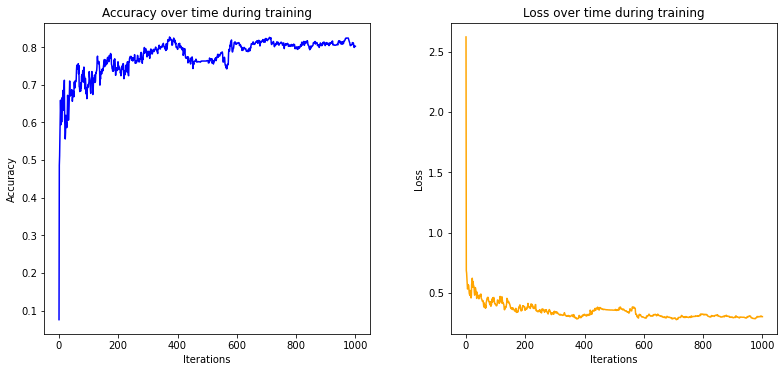

In [8]:
fig, ax = plt.subplots(1, 2, figsize=[12,6])
fig.tight_layout(pad=5.0)
ax[0].plot(list(range(iterations + 1)), accs, color = 'b')
ax[0].set_xlabel('Iterations')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy over time during training')

ax[1].plot(list(range(iterations + 1)), losses, color = 'orange')
ax[1].set_xlabel('Iterations')
ax[1].set_ylabel('Loss')
ax[1].set_title('Loss over time during training')

In [9]:
acc, loss = test_ffnn(x_test, y_test, hw, ow, hb, ob, alpha)

print(f'The test accuracy was {acc} and the final loss was {loss}')

The test accuracy was 0.761 and the final loss was 1.461


C:\Users\nikit\AppData\Local\Temp/ipykernel_17564/1979425254.py:12: RuntimeWarning: overflow encountered in exp
  return np.power(1 + np.exp(-alpha*x), -1)
